# Models Tuning

---
This notebook explores hyperparameter tuning across multiple models, optimizing each model's performance to identify the best fit for our dataset and objectives.

---
## Load Data

In [91]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import random

# Set seed
np.random.seed(42)
random.seed(42)

# from sklearn
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
import xgboost as xgb
from sklearn.svm import SVR
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.linear_model import Ridge,Lasso
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

In [92]:
#youth_crime = pd.read_csv('../data/state_demo_crime_youth_data_combined_clean.csv')
youth_crime =pd.read_csv('../data/data.csv')
#youth_crime =pd.read_csv('../data/data_engineered.csv')
youth_crime.head()

,state,year,total_pop,white_pop,black_pop,hispanic_pop,asian_pop,native_pop,islander_pop,multi_race_pop,...,rate:__crimes_against_society,rate:__fraud_and_other_financial_crimes,rate:__property_crime,rate:__violent_crime,youth_not_in_school,youth_in_foster_care,youth_living_in_poverty,total_crime_count,total_crime_rate,log_total_crime_rate
0,AL,2022,4916000,0.645,0.252,0.0480,0.0140,0.002,0.0,0.039,...,189.36,36.01,253.48,298.96,73000.0,819.25,240000.000000,39465.0,777.81,6.657767
1,AL,2021,4900800,0.644,0.255,0.0470,0.0130,0.004,0.0,0.037,...,128.17,24.48,219.86,218.90,86000.0,819.25,245000.000000,29868.0,591.41,6.384199
2,AL,2020,4833950,0.649,0.260,0.0455,0.0135,0.004,0.0,0.028,...,13.00,1.79,12.91,16.67,82000.0,819.25,249833.333333,2233.0,44.37,3.814851
3,AL,2019,4767100,0.654,0.265,0.0440,0.0140,0.004,0.0,0.019,...,3.74,1.21,6.80,4.32,74000.0,800.00,228000.000000,808.0,16.07,2.837323
4,AL,2018,4752600,0.656,0.265,0.0430,0.0130,0.010,0.0,0.019,...,1.31,0.62,1.47,2.09,86000.0,829.00,255000.000000,276.0,5.49,1.870263


### Features and Target Variable

In [94]:
# Define features (X) and target variable (y)

# columns to exclude: population-related and crime-related features
crime_related_columns = [
    'count:__crimes_against_society', 
    'count:__fraud_and_other_financial_crimes', 
    'count:__property_crime', 
    'count:__violent_crime',
    'rate:__crimes_against_society', 
    'rate:__fraud_and_other_financial_crimes', 
    'rate:__property_crime', 
    'rate:__violent_crime',
    'total_crime_count',
    'total_crime_rate',
    'log_total_crime_rate'
]

population_related_columns = [
    'total_pop',
    'white_pop',
    'black_pop',
    'hispanic_pop',
    'asian_pop',
    'native_pop',
    'islander_pop',
    'multi_race_pop',
    'state'
]



#features to keep: exclude population-related and crime-related features
X = youth_crime.drop(columns=crime_related_columns + population_related_columns)

# Display the list of features used for modeling
filtered_features = X.columns.tolist()
print(filtered_features)


y = youth_crime['log_total_crime_rate']



['year', 'median_income', 'poverty_rate', 'unemployment_rate', 'unemployed_15_weeks', 'labor_force_participation_rate', 'hs_grad_rate', 'bachelors_grad_rate', 'zhvi', 'crude_rate_suicide', 'crude_rate_od', 'youth_not_in_school', 'youth_in_foster_care', 'youth_living_in_poverty']


### Train-Test Split

In [96]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (170, 14)
X_test shape: (43, 14)
y_train shape: (170,)
y_test shape: (43,)


---
## Create Models

###  Decision Tree Model

In [99]:
# establish Logistic Regression pipeline with CountVectorizer
pipe_dt = Pipeline([
    ('dt', DecisionTreeRegressor(random_state = 42,
                                 max_depth = 5,
                                 min_samples_split = 7,
                                 min_samples_leaf = 3,
                                 ccp_alpha = 0.01))
])
print("Decision Tree Model:")
# calculate cross validation score mean
print(f'Cross Validation mean: {cross_val_score(pipe_dt, X_train, y_train, cv = 3).mean()}')

# fit model to training data
pipe_dt.fit(X_train, y_train)
# Make predictions
y_train_pred = pipe_dt.predict(X_train)
y_test_pred = pipe_dt.predict(X_test)
#Evaluate Model
# training 
print(f'Training MSE: {mean_squared_error(y_train,y_train_pred)}')
print(f'Training MAE: {mean_absolute_error(y_train,y_train_pred)}')
print(f'Training R2 {r2_score(y_train,y_train_pred)}')

# test 
print(f'Testing MSE: {mean_squared_error(y_test,y_test_pred)}')
print(f'Testing MAE: {mean_absolute_error( y_test,y_test_pred)}')
print(f'Testing R2: {r2_score(y_test,y_test_pred)}')

Decision Tree Model:
Cross Validation mean: -0.12128409535216182
Training MSE: 0.23398232825279
Training MAE: 0.361708590808567
Training R2 0.8134340134094586
Testing MSE: 1.2808269331636017
Testing MAE: 0.7551150302755882
Testing R2: -0.2589105086351564


- The Decision Tree model shows significant overfitting, as indicated by its strong performance on the training set but poor results on the test set.
-  During training, the model achieves a high R² score of 0.81 with a low MSE of 0.23 and an MAE of 0.36, suggesting it fits the training data well. However, on the test set, the model’s R² score drops to -0.26, meaning it fails to explain the variance in the target variable, with high error metrics (MSE of 1.28 and MAE of 0.76).
-  The negative cross-validation mean further indicates instability, suggesting that the model lacks generalizability and may require regularization or pruning to improve performance on unseen data.

#### GridSearch DecisionTree

In [102]:
grid_dt = GridSearchCV(estimator = DecisionTreeRegressor(random_state = 42),
                    param_grid = {'max_depth': range(2,8,1),
                                  'min_samples_split': range(8,25,3),
                                  'min_samples_leaf': range(2,7),
                                  'ccp_alpha': [0, 0.001, 0.01, 0.1, 1, 10],
                                  'max_features': range(5,21,5)},
                    cv = 5,
                    verbose = 1)

In [103]:
# start timer
t0 = time.time()

# print start time
print(t0)

# gridsearch
grid_dt.fit(X_train, y_train)

# print end time
print(time.time() - t0)
best_model_dt = grid_dt.best_estimator_

print(f'best_model_dt:{best_model_dt}')
print(f'best score decision_tree:{grid_dt.best_score_}')

1730466362.691125
Fitting 5 folds for each of 4320 candidates, totalling 21600 fits
27.44123125076294
best_model_dt:DecisionTreeRegressor(ccp_alpha=0.01, max_depth=4, max_features=10,
                      min_samples_leaf=5, min_samples_split=14,
                      random_state=42)
best score decision_tree:0.2535229833294952


/opt/anaconda3/lib/python3.11/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [104]:
# Make predictions
y_train_pred = grid_dt.predict(X_train)
y_test_pred = grid_dt.predict(X_test)
#Evaluate Model
print("Grid Search Decision Tree Model")
# training 
print(f'Training MSE: {mean_squared_error(y_train,y_train_pred)}')
print(f'Training MAE: {mean_absolute_error(y_train,y_train_pred)}')
print(f'Training R2 {r2_score(y_train,y_train_pred)}')

# test 
print(f'Testing MSE: {mean_squared_error(y_test,y_test_pred)}')
print(f'Testing MAE: {mean_absolute_error( y_test,y_test_pred)}')
print(f'Testing R2: {r2_score(y_test,y_test_pred)}')

Grid Search Decision Tree Model
Training MSE: 0.5123815895267154
Training MAE: 0.5126615524092865
Training R2 0.5914521516445266
Testing MSE: 0.7728572851516694
Testing MAE: 0.6127111926318202
Testing R2: 0.2403671934431464



- The Grid Search Decision Tree model shows improved generalization over the baseline Decision Tree, but it still exhibits signs of overfitting.
- In the training set, the model achieves an R² score of 0.59, indicating it explains 59% of the variance, with an MSE of 0.51 and an MAE of 0.51. On the test set, the R² score drops to 0.24, showing reduced variance explanation.
- The testing MSE is 0.77, and the MAE is 0.61, which are higher than the training errors, but the results are more balanced compared to the non-tuned model. This suggests that while the grid search has helped improve test performance, further tuning or complexity reduction might be needed to enhance its generalizability.

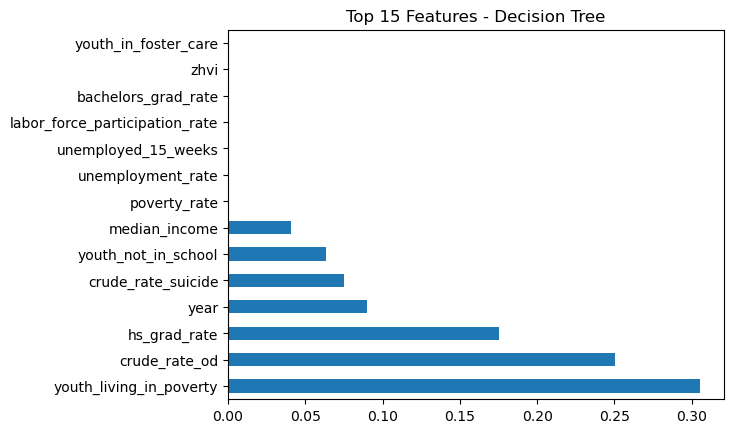

In [106]:
feat_importances = pd.Series(best_model_dt.feature_importances_, index = X_train.columns)
feat_importances.nlargest(15).plot(kind = 'barh')
plt.title('Top 15 Features - Decision Tree')

plt.show()

----------

### Random Forest Model

In [109]:
# 
pipe_rf = Pipeline([
    ('rf', RandomForestRegressor(random_state = 42,
                                 max_depth = 5,
                                 min_samples_split = 7,
                                 min_samples_leaf = 3,
                                 ccp_alpha = 0.01))
])

In [110]:

pipe_rf.fit(X_train, y_train)

# Make predictions
y_train_pred = pipe_rf.predict(X_train)
y_test_pred = pipe_rf.predict(X_test)
#Evaluate Model
print("Random Forest Model")
# calculate cross validation score mean
print(f'Cross Validation mean: {cross_val_score(pipe_rf, X_train, y_train, cv = 3).mean()}')

# fit model to training
# training 
print(f'Training MSE: {mean_squared_error(y_train,y_train_pred)}')
print(f'Training MAE: {mean_absolute_error(y_train,y_train_pred)}')
print(f'Training R2 {r2_score(y_train,y_train_pred)}')

# test 
print(f'Testing MSE: {mean_squared_error(y_test,y_test_pred)}')
print(f'Testing MAE: {mean_absolute_error( y_test,y_test_pred)}')
print(f'Testing R2: {r2_score(y_test,y_test_pred)}')

Random Forest Model
Cross Validation mean: 0.3226563663984636
Training MSE: 0.2913215049725031
Training MAE: 0.37363551899995584
Training R2 0.7677145774380153
Testing MSE: 0.46580833925070414
Testing MAE: 0.5100547903233459
Testing R2: 0.5421621781139587


- The Random Forest model demonstrates strong predictive performance with good generalization between the training and test sets.
-  In training, the model achieves an R² score of 0.77, explaining 77% of the variance, with a low MSE of 0.29 and an MAE of 0.37.
-  On the test set, it maintains a high R² score of 0.54, explaining 54% of the variance, with an MSE of 0.47 and an MAE of 0.51. The positive cross-validation mean of 0.32 further supports its robustness. 

#### GridSearch RandomForest

In [113]:
grid_rf = GridSearchCV(estimator = RandomForestRegressor(random_state = 42, n_jobs = -1),
                    param_grid = {'max_depth': range(2,8,1),
                                  'min_samples_split': range(8,25,3),
                                  'min_samples_leaf': range(2,7),
                                  'ccp_alpha': [0, 0.001, 0.01, 0.1, 1, 10],
                                  'max_features': range(5,21,5)},
                    cv = 5,
                    verbose = 1)

In [114]:
# start timer
t0 = time.time()

# print start time
print(t0)

# gridsearch
grid_rf.fit(X_train, y_train)

# print end time
print(time.time() - t0)
best_model_rf = grid_rf.best_estimator_
print(f'best_model_rf:{best_model_rf}')
print(f'best score :{grid_rf.best_score_}')

1730466390.607328
Fitting 5 folds for each of 4320 candidates, totalling 21600 fits
1441.4516899585724
best_model_rf:RandomForestRegressor(ccp_alpha=0, max_depth=7, max_features=15,
                      min_samples_leaf=2, min_samples_split=8, n_jobs=-1,
                      random_state=42)
best score :0.29896713899378585


In [115]:
# Make predictions
y_train_pred = best_model_rf.predict(X_train)
y_test_pred = best_model_rf.predict(X_test)
#Evaluate Model
print("Grid SearchRandom Forest Model")
# training 
print(f'Training MSE: {mean_squared_error(y_train,y_train_pred)}')
print(f'Training MAE: {mean_absolute_error(y_train,y_train_pred)}')
print(f'Training R2 {r2_score(y_train,y_train_pred)}')

# test 
print(f'Testing MSE: {mean_squared_error(y_test,y_test_pred)}')
print(f'Testing MAE: {mean_absolute_error( y_test,y_test_pred)}')
print(f'Testing R2: {r2_score(y_test,y_test_pred)}')

Grid SearchRandom Forest Model
Training MSE: 0.22912824200345822
Training MAE: 0.3116912581274431
Training R2 0.8173044227556028
Testing MSE: 0.4448163512867545
Testing MAE: 0.47890275829400913
Testing R2: 0.5627949689779711



- The Grid Search Random Forest model demonstrates improved performance and generalization, achieving an R² score of 0.82 on the training set, which indicates it explains 82% of the variance with a low MSE of 0.23 and an MAE of 0.31. On the test set, it retains a strong R² score of 0.56, explaining 56% of the variance, with an MSE of 0.44 and an MAE of 0.48. 

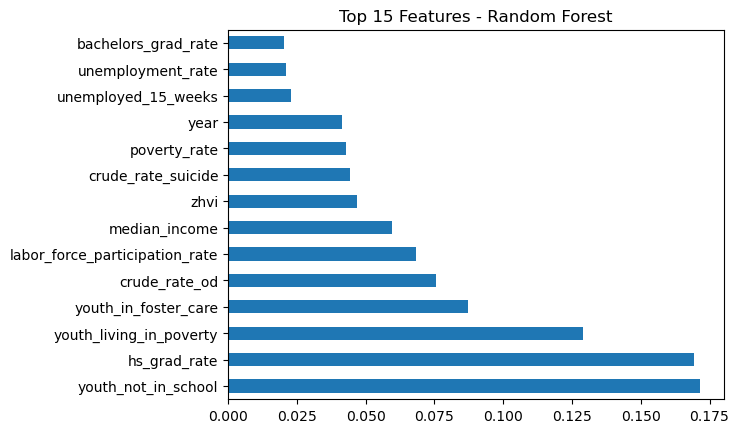

In [117]:
feat_importances = pd.Series(best_model_rf.feature_importances_, index = X_train.columns)
feat_importances.nlargest(15).plot(kind = 'barh')
plt.title('Top 15 Features - Random Forest');


---

### Gradient Boosting

In [120]:

#https://scikit-learn.org/1.5/auto_examples/ensemble/plot_gradient_boosting_early_stopping.html

# Pipeline setup
gb_pipeline = Pipeline(steps=[

    ('gb', GradientBoostingRegressor(n_estimators=1000, max_depth=5, learning_rate=0.1, random_state=42))
])

# Fit the pipeline to the training data
gb_pipeline.fit(X_train, y_train)

# Prediction
y_train_pred = gb_pipeline.predict(X_train)
y_test_pred = gb_pipeline.predict(X_test)

# Calculate training and testing scoresa
train_mse = mean_squared_error(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("Gradient Boosting Model:")
print("Training MSE:", train_mse)
print("Training MAE:", train_mae)
print("Training R²:", train_r2)

print("Testing MSE:", test_mse)
print("Testing MAE:", test_mae)
print("Testing R²:", test_r2)

Gradient Boosting Model:
Training MSE: 2.2181695963873398e-16
Training MAE: 1.208383055513054e-08
Training R²: 0.9999999999999998
Testing MSE: 0.5809585454325432
Testing MAE: 0.4908044019065091
Testing R²: 0.4289823246299551


- On the training set, it achieves near-perfect scores, with an MSE close to zero, an MAE near zero, and an R² of 1.0, indicating it perfectly captures the training data. However, on the test set, the model's performance drops, with an R² score of 0.43, explaining only 43% of the variance, along with a higher MSE of 0.58 and an MAE of 0.49. This discrepancy between training and testing results suggests the model may be too complex, capturing noise in the training data rather than generalizable patterns. Regularization or tuning hyperparameters could help improve generalization on the test set.

#### Grid Search Gradient Boosting

In [123]:
# Define the parameter grid for Gradient Boosting
param_grid = {
    'gb__n_estimators': [200, 300,400,500,1000],
    'gb__max_depth': [3, 4,5,],
    'gb__learning_rate': [0.01, 0.05, 0.1,0.2,0.3],
    'gb__min_samples_split': [2, 5, 10,15],
    'gb__min_samples_leaf': [1, 2, 4],
    'gb__subsample': [0.6, 0.8, 1.0]
}

# Setup GridSearchCV with the pipeline and parameter grid
grid_search = GridSearchCV(gb_pipeline, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1, verbose=1)

# Fit GridSearchCV on the training data
grid_search.fit(X_train, y_train)

# Best parameters from grid search
best_params = grid_search.best_params_
best_score = grid_search.best_score_ 

print("Best Parameters:", best_params)
print("Best Cross-Validated MSE:", best_score)


Fitting 5 folds for each of 2700 candidates, totalling 13500 fits
Best Parameters: {'gb__learning_rate': 0.1, 'gb__max_depth': 3, 'gb__min_samples_leaf': 4, 'gb__min_samples_split': 10, 'gb__n_estimators': 200, 'gb__subsample': 0.6}
Best Cross-Validated MSE: 0.4154684480129388


/opt/anaconda3/lib/python3.11/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [124]:
# Predictions
best_model = grid_search.best_estimator_
print(best_model)
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

# Calculate training and testing scores
train_mse = mean_squared_error(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)
print("Best Parameters:", best_params)
print("Grid Search Gradient Boosting Model:")
print("Best Cross-Validated R²:", best_score)
print("Training MSE:", train_mse)
print("Training MAE:", train_mae)
print("Training R²:", train_r2)
print("Testing MSE:", test_mse)
print("Testing MAE:", test_mae)
print("Testing R²:", test_r2)


Pipeline(steps=[('gb',
                 GradientBoostingRegressor(min_samples_leaf=4,
                                           min_samples_split=10,
                                           n_estimators=200, random_state=42,
                                           subsample=0.6))])
Best Parameters: {'gb__learning_rate': 0.1, 'gb__max_depth': 3, 'gb__min_samples_leaf': 4, 'gb__min_samples_split': 10, 'gb__n_estimators': 200, 'gb__subsample': 0.6}
Grid Search Gradient Boosting Model:
Best Cross-Validated R²: 0.4154684480129388
Training MSE: 0.016767116412044588
Training MAE: 0.09960786305188497
Training R²: 0.9866307270337444
Testing MSE: 0.3730644274398805
Testing MAE: 0.43551752441492986
Testing R²: 0.6333191347389993


- The Grid Search Gradient Boosting model, after hyperparameter tuning, shows strong performance with improved generalization.
- It achieves a high R² score of 0.99 on the training set, explaining 98.66% of the variance with a low MSE of 0.016 and MAE of 0.10.
- On the test set, it performs well with an R² score of 0.63, explaining 63.3% of the variance, with an MSE of 0.37 and MAE of 0.44. The high cross-validated R² score of 0.42 further supports its robustness.

----

###  XG Boosting

In [128]:
#https://xgboost.readthedocs.io/en/latest/python/sklearn_estimator.html
# Define the callback for early stopping
ss= StandardScaler()
X_train_sc = ss.fit_transform(X_train)
X_test_sc =ss.transform(X_test)
early_stop = xgb.callback.EarlyStopping(
    rounds=8,  # Stop after 2 rounds of no improvement
    metric_name='rmse',  # Change this to the metric you want to monitor
    data_name='validation_0',  # Corresponds to the eval_set name
    save_best=True
)

# Fit the XGBRegressor with early stopping callback
model = XGBRegressor(
    n_estimators=1000, 
    learning_rate=0.1, 
    max_depth=5, 
    tree_method="hist",
    callbacks=[early_stop],
    random_state=42
)

# Define the evaluation set (validation)
eval_set = [(X_test_sc, y_test)]

# Fit the model with the early stopping callback
model.fit(
    X_train_sc, y_train,
    eval_set=eval_set,
    verbose=False,
      # Pass the early stopping callback
)

# Predict and evaluate
y_train_pred = model.predict(X_train_sc)
y_test_pred = model.predict(X_test_sc)

# Evaluating the model on training, validation, and testing sets
mse_train = mean_squared_error(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train= r2_score(y_train, y_train_pred)


mse_test = mean_squared_error(y_test, y_test_pred)
mae_test= mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)


print("XG Boosting Model:")
print("Training MSE:", mse_train)
print("Training MAE:", mae_train)
print("Training R²:", r2_train)
print("Testing MSE:", mse_test)
print("Testing MAE:", mae_test)
print("Testing R²:", r2_test)


XG Boosting Model:
Training MSE: 0.09236481483620004
Training MAE: 0.21534391164269334
Training R²: 0.9263528449569445
Testing MSE: 0.5661256697029303
Testing MAE: 0.5206676988646752
Testing R²: 0.44356139276616824


- The XGBoost model achieves a near-perfect fit on the training data but struggles with overfitting, as evidenced by the performance gap on the testing set. The model’s high complexity may be capturing noise in the training data, reducing its ability to generalize.


#### GridSearch XG Boosting

In [131]:
# Define the parameter grid
# Define parameter grid for hyperparameter tuning
# Pipeline setup
xg_pipeline = Pipeline(steps=[
    #('preprocessor', column_transformer),
    ('scaler', StandardScaler()),
    ('xgb', XGBRegressor(random_state=42, alpha=1.5))
])
param_grid = {
    'xgb__n_estimators': [100, 200,1000],
    'xgb__learning_rate': [0.01, 0.05, 0.1],
    'xgb__max_depth': [3, 5],
    'xgb__subsample': [0.8, 0.9, 1.0],
    'xgb__colsample_bytree': [0.7, 0.8, 1.0],
    'xgb__lambda': [0, 1, 10],       # L2 regularization
    'xgb__alpha': [0, 0.5, 1]        # L1 regularization
}

# Set up GridSearchCV
grid_search = GridSearchCV(
    xg_pipeline,
    param_grid=param_grid,
    cv=5,                             # 5-fold cross-validation
                    
    n_jobs=-1,                        # Use all available cores
   
)

# Fit GridSearchCV to the training data
# Fit with early stopping
grid_search.fit(
    X_train, y_train,
 
)


# Retrieve best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_
best_model = grid_search.best_estimator_

y_train_pred = grid_search.best_estimator_.predict(X_train)
y_test_pred = grid_search.best_estimator_.predict(X_test)
# Evaluate the best model on the test set
train_mse = mean_squared_error(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("Grid Search XG Boosting Model:")
print("Best Parameters:", best_params)

print("Best Cross-Validated R²:", best_score)

print("Training MSE:", train_mse)
print("Training MAE:", train_mae)
print("Training R²:", train_r2)
print("Testing MSE:", test_mse)
print("Testing MAE:", test_mae)
print("Testing R²:", test_r2)


Grid Search XG Boosting Model:
Best Parameters: {'xgb__alpha': 0.5, 'xgb__colsample_bytree': 0.8, 'xgb__lambda': 0, 'xgb__learning_rate': 0.05, 'xgb__max_depth': 3, 'xgb__n_estimators': 1000, 'xgb__subsample': 0.8}
Best Cross-Validated R²: 0.4421562117305452
Training MSE: 0.0034009569546941563
Training MAE: 0.04306495991372452
Training R²: 0.9972882443971625
Testing MSE: 0.3507900128249372
Testing MAE: 0.4045781167508822
Testing R²: 0.6552124084564617


- The Grid Search XGBoost model, with tuned parameters, performs very well on the training data, achieving an R² score of 0.997, an exceptionally low MSE of 0.0034, and MAE of 0.043, suggesting near-perfect fit. On the test set, the model also improves significantly, with an R² of 0.66, explaining 65.5% of the variance, and a reduced MSE of 0.35 and MAE of 0.40.

---

### SVM

In [135]:


# Define the SVM pipeline with scaling
svm_pipeline = Pipeline([
    #('preprocessor', column_transformer),
    ('scaler', StandardScaler()),       # Scale features for SVR
    ('svr', SVR(kernel='linear',C=1.0, epsilon=0.1)   ) # Basic SVR model with default parameters
])


# Fit the pipeline on the training data
svm_pipeline.fit(X_train, y_train)

# Make predictions on training and testing sets

y_train_pred = svm_pipeline.predict(X_train)
y_test_pred = svm_pipeline.predict(X_test)

# Evaluate the model performance
train_mse = mean_squared_error(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2_log = r2_score(y_test, y_test_pred)


print("SVM Model:")
print("Training MSE:", train_mse)
print("Training MAE:", train_mae)
print("Training R²:", train_r2)
print("Testing MSE:", test_mse)
print("Testing MAE:", test_mae)
print("Testing R²:", test_r2)


SVM Model:
Training MSE: 1.0309276081688419
Training MAE: 0.6299993735786353
Training R²: 0.17798909106652316
Testing MSE: 0.7230802486151708
Testing MAE: 0.5611623703698916
Testing R²: 0.6552124084564617


- The SVM model shows a moderate fit, with a low training R² score of 0.18, indicating it explains only 17.8% of the variance in the training data, which is relatively low. The model's performance on the test data improves significantly, with an R² of 0.66, meaning it explains about 65.5% of the variance. The MSE and MAE scores are 1.03 and 0.63 for training and 0.72 and 0.56 for testing, respectively, which suggests that while the model does generalize reasonably well, it may benefit from further tuning to improve its performance on both training and test sets.

#### GridSearch SVM

In [138]:
# Define the parameter grid for GridSearchCV
param_grid = {
    'svr__C': [0.1, 1, 10],              # Regularization strength
    'svr__epsilon': [0.01, 0.1, 0.5],    # Insensitivity margin
    'svr__kernel': ['linear', 'rbf']      # Kernels to test
}

# Set up GridSearchCV with cross-validation
grid_search = GridSearchCV(svm_pipeline, param_grid, cv=5, scoring='r2', verbose=1, n_jobs=-1)

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Retrieve the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_
best_model = grid_search.best_estimator_
# Make predictions with the best estimator on the test set
y_train_pred = grid_search.best_estimator_.predict(X_train)
y_test_pred= grid_search.best_estimator_.predict(X_test)

# Evaluate the model on the test set
train_mse = mean_squared_error(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("Grid Search SVM Model:")
print("Best Parameters:", best_params)
print("Best Cross-Validated R²:", best_score)

print("Training MSE:", train_mse)
print("Training MAE:", train_mae)
print("Training R²:", train_r2)
print("Testing MSE:", test_mse)
print("Testing MAE:", test_mae)
print("Testing R²:", test_r2)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Grid Search SVM Model:
Best Parameters: {'svr__C': 10, 'svr__epsilon': 0.01, 'svr__kernel': 'rbf'}
Best Cross-Validated R²: 0.1702495271117567
Training MSE: 0.32012566753299265
Training MAE: 0.15736639943819547
Training R²: 0.7447475566115269
Testing MSE: 0.28988845839135274
Testing MAE: 0.36538109942988767
Testing R²: 0.7150718671260916


---

### Stacking

In [142]:
# Define base models and meta model
base_models = [
    ('gradient_boosting', GradientBoostingRegressor(learning_rate=0.05, max_depth=4, n_estimators=500, random_state=42,min_samples_leaf= 1,min_samples_split= 5)),
    ('random_forest', RandomForestRegressor(ccp_alpha=0.1,n_estimators=50, max_depth=7,random_state=42,min_samples_leaf= 4,min_samples_split= 8)),
   ('lasso', Lasso(alpha=0.1, max_iter=10000))
]


meta_model = Ridge(alpha=1.0)


# Define the stacking regressor
stacked_ensemble = StackingRegressor(estimators=base_models, final_estimator=meta_model, cv=5)

# Create pipeline with stacking ensemble
stacking_pipeline = Pipeline(steps=[
    #('preprocessor', column_transformer),
    ('scaler', StandardScaler()),
    ('stacked_model', stacked_ensemble)
])

# Fit GridSearchCV on the training data to find the best parameters
stacking_pipeline.fit(X_train, y_train)


# Evaluate the stacked model on the test data
y_train_pred = stacking_pipeline.predict(X_train)
y_test_pred= stacking_pipeline.predict(X_test)

ensemble_train_score = stacking_pipeline.score(X_train, y_train)
ensemble_test_score = stacking_pipeline.score(X_test, y_test)

# Evaluate the model on the test set
train_mse = mean_squared_error(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)


print("Stacking Model:")
print("Training MSE:", train_mse)
print("Training MAE:", train_mae)
print("Training R²:", train_r2)
print("Testing MSE:", test_mse)
print("Testing MAE:", test_mae)
print("Testing R²:", test_r2)

Stacking Model:
Training MSE: 0.04634408365316608
Training MAE: 0.16744315475654353
Training R²: 0.9630475098100302
Testing MSE: 0.4377401817299236
Testing MAE: 0.48199118444607375
Testing R²: 0.569750057120891


- The model shows strong performance on the training set with an R² of 0.96, indicating it explains about 96% of the variance, a low training MSE of 0.046, and a low MAE of 0.167. However, on the test set, the R² drops to 0.57, with a higher MSE of 0.44 and an MAE of 0.48. This suggests that while the model captures the patterns in the training data effectively, it may slightly overfit, as indicated by the discrepancy between training and test scores.

---

### Bagging XGBoost

In [146]:
# Initialize XGBoost Regressor
xgb_regressor = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3)

# Set up Bagging with XGBoost as the base estimator
bagging_xgb = BaggingRegressor(
    estimator=xgb_regressor,
    n_estimators=10,          # Number of XGBoost models in the ensemble
    max_samples=0.8,          # Fraction of data used for each bootstrapped sample
    max_features=1.0,         # Fraction of features used for each model
    bootstrap=True,           # Bootstrapping samples
    n_jobs=-1,                # Use all processors
    random_state=42
)

# Train the bagging ensemble
bagging_xgb.fit(X_train, y_train)

# Make predictions

y_train_pred = stacking_pipeline.predict(X_train)
y_test_pred= stacking_pipeline.predict(X_test)


# Evaluate the model on the test set
train_mse = mean_squared_error(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)
print("Bagging XGBoost Model:")
print("Training MSE:", train_mse)
print("Training MAE:", train_mae)
print("Training R²:", train_r2)
print("Testing MSE:", test_mse)
print("Testing MAE:", test_mae)
print("Testing R²:", test_r2)



Bagging XGBoost Model:
Training MSE: 0.04634408365316608
Training MAE: 0.16744315475654353
Training R²: 0.9630475098100302
Testing MSE: 0.4377401817299236
Testing MAE: 0.48199118444607375
Testing R²: 0.569750057120891


- The Bagging XGBoost model demonstrates strong predictive power on the training set, achieving an R² of 0.96, a low MSE of 0.046, and a MAE of 0.167, indicating it explains the majority of the variance and has minimal error in the training predictions. On the test set, the performance decreases slightly with an R² of 0.57, an MSE of 0.44, and an MAE of 0.48. This shows that while the model performs well, there is a slight tendency to overfit, though it still provides fairly reliable predictions on the test data

---